In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [336]:
fm22 = pd.read_csv('variables.csv')
fm22

,Unnamed: 0,Name,Apps,Mins,Mins/Gm,Height,Weight,Age,Av Rat,Gls,...,Off,Based,Tck R,CA,Saves,Saves/xSv%,Gls/xG,Dist/Mins,Transfer Value,Value
0,0,Josip Mijatović,12.0,809.0,67.416667,173.0,68.0,20,7.14,1.0,...,0.0,Croatia (3. HNL Zapad),0.88,84,0.0,0.000000,5.555556,0.126823,€3K - €9K,6000.0
1,1,Duje Ninčević,15.0,1161.0,77.400000,172.0,69.0,25,6.84,0.0,...,0.0,Croatia (3. HNL Jug),0.76,79,0.0,0.000000,0.000000,0.129457,€0 - €2.5K,1250.0
2,2,Marin Karabatić,15.0,1350.0,90.000000,170.0,62.0,22,6.90,0.0,...,0.0,Croatia (3. HNL Jug),0.77,87,0.0,0.000000,0.000000,0.128000,€0 - €12K,6000.0
3,3,Vicko Ševelj,20.0,1738.0,86.900000,192.0,86.0,22,7.15,1.0,...,1.0,Bosnia & Herzegovina (Liga 12),0.88,95,0.0,0.000000,2.380952,0.058631,€100K - €1M,550000.0
4,4,Fran Vujnović,15.0,1384.0,92.266667,190.0,77.0,19,7.23,4.0,...,0.0,Croatia (3. HNL Istok),0.93,83,0.0,0.000000,0.000000,0.016040,€14K - €150K,82000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1117,Sergio Ramos,11.0,924.0,84.000000,184.0,82.0,36,7.15,0.0,...,0.0,France (Ligue 1),0.74,156,0.0,0.000000,0.000000,0.123268,€12M - €18M,15000000.0
1118,1118,Marquinhos,13.0,1129.0,86.846154,183.0,75.0,28,7.33,1.0,...,1.0,France (Ligue 1),1.00,163,0.0,0.000000,3.448276,0.126749,€99M - €128M,113500000.0
1119,1119,Thibaut Courtois,19.0,1710.0,90.000000,199.0,96.0,30,7.42,0.0,...,0.0,Spain (LaLiga),0.33,180,48.0,-0.848956,0.000000,0.072982,€172M - €225M,198500000.0
1120,1120,Raphaël Varane,17.0,1463.0,86.058824,191.0,81.0,29,7.36,0.0,...,2.0,England (Premier League),0.81,164,0.0,0.000000,0.000000,0.107792,€101M - €127M,114000000.0


In [619]:
fm22.isnull().sum()

Unnamed: 0          0
Name                0
Apps                0
Mins                0
Mins/Gm             0
Height              0
Weight              0
Age                 0
Av Rat              0
Gls                 0
Gls/90              0
Shot %              0
Pen/R               0
xG                  0
Ch C/90             0
Asts/90             0
K Ps/90             0
Pas %               0
Cr C/A              0
Drb/90              0
Distance            0
Hdr %               0
K Tck               0
Fls                 0
Int/90              0
Clear               0
Con/90              0
xSv %               0
Sv %                0
Svh                 0
Svt                 0
Svp                 0
Pens Saved Ratio    0
PoM                 0
Aer A/90            0
Off                 0
Based               0
Tck R               0
CA                  0
Saves               0
Saves/xSv%          0
Gls/xG              0
Dist/Mins           0
Transfer Value      0
Value               0
dtype: int

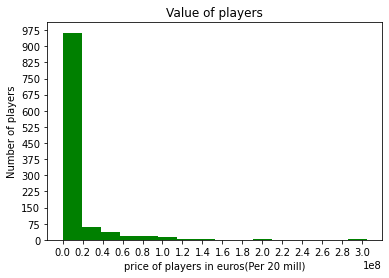

In [338]:
x = fm22.iloc[:,-1] 
y = fm22.iloc[:,-9] 
plt.hist(x,bins=16,color='green')
plt.title('Value of players')
plt.xlabel('price of players in euros(Per 20 mill)')
plt.ylabel('Number of players')
plt.yticks([0,75,150,225,300,375,450,525,600,675,750,825,900,975]) 
plt.xticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8,1.8e8,2e8,2.2e8,2.4e8,2.6e8,2.8e8,3e8])
plt.show()

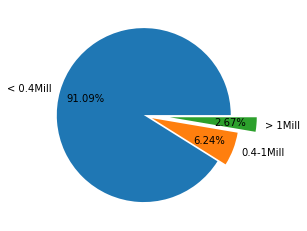

In [339]:
a=fm22.loc[fm22['Value']<0.4e8].count()[0]
b=fm22.loc[(fm22['Value']>=0.4e8) & (fm22['Value']<1e8)].count()[0]
c=fm22.loc[fm22['Value']>=1e8].count()[0]


labels=['< 0.4Mill','0.4-1Mill','> 1Mill']
explode=[0,0.1,0.3]

plt.pie([a,b,c],autopct='%.2f%%',explode=explode,pctdistance=0.7,labels=labels)

plt.show()

In [475]:
fm22_d = pd.get_dummies(fm22,columns=['Based'])
fm22_n = fm22_d.drop(['Name','Transfer Value'],axis=1)

In [600]:
x1 = fm22_n.drop('Value',axis=1)
y1 = fm22_n['Value']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3,random_state=0)
reg = LinearRegression()

In [601]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s1=scaler.fit_transform(X_train)
t1=scaler.fit_transform(X_train)
s2=scaler.fit_transform(X_test)
t2=scaler.fit_transform(X_test)

In [602]:
reg.fit(s1,t1)
reg.score(s1,t1)

1.0

In [603]:
reg.score(s2,t2)

0.7961532803733318

In [616]:
from sklearn.linear_model import Ridge
ridge=Ridge(0.01)
ridge.fit(s1,t1)

Ridge(alpha=0.01)

In [617]:
ridge.score(s2,t2)

0.7961538534681586